In [30]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


warnings.filterwarnings('ignore')

### <center>Изучение данных

In [31]:
gender_submission = pd.read_csv("data/gender_submission.csv")
print(f"GenderSubmission:")
display(gender_submission.info())
display(gender_submission.sample(5))
print("\nNaN:")
display(gender_submission.isna().sum())

GenderSubmission:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


None

,PassengerId,Survived
106,998,0
326,1218,1
289,1181,0
295,1187,0
218,1110,1



NaN:


PassengerId    0
Survived       0
dtype: int64

In [32]:
train = pd.read_csv("data/train.csv")
print(f"\nTrain:")
display(train.info())


Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [33]:
test = pd.read_csv("data/test.csv")
print(f"\nTest:")
display(test.info())


Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

### <center>Объединение таблиц

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
644,645,1.0,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
417,418,1.0,2,"Silven, Miss. Lyyli Karoliina",female,18.00,0,2,250652,13.0000,NaN,S
1173,1174,NaN,3,"Fleming, Miss. Honora",female,NaN,0,0,364859,7.7500,NaN,Q
921,922,NaN,2,"Louch, Mr. Charles Alexander",male,50.00,1,0,SC/AH 3085,26.0000,NaN,S
1181,1182,NaN,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S


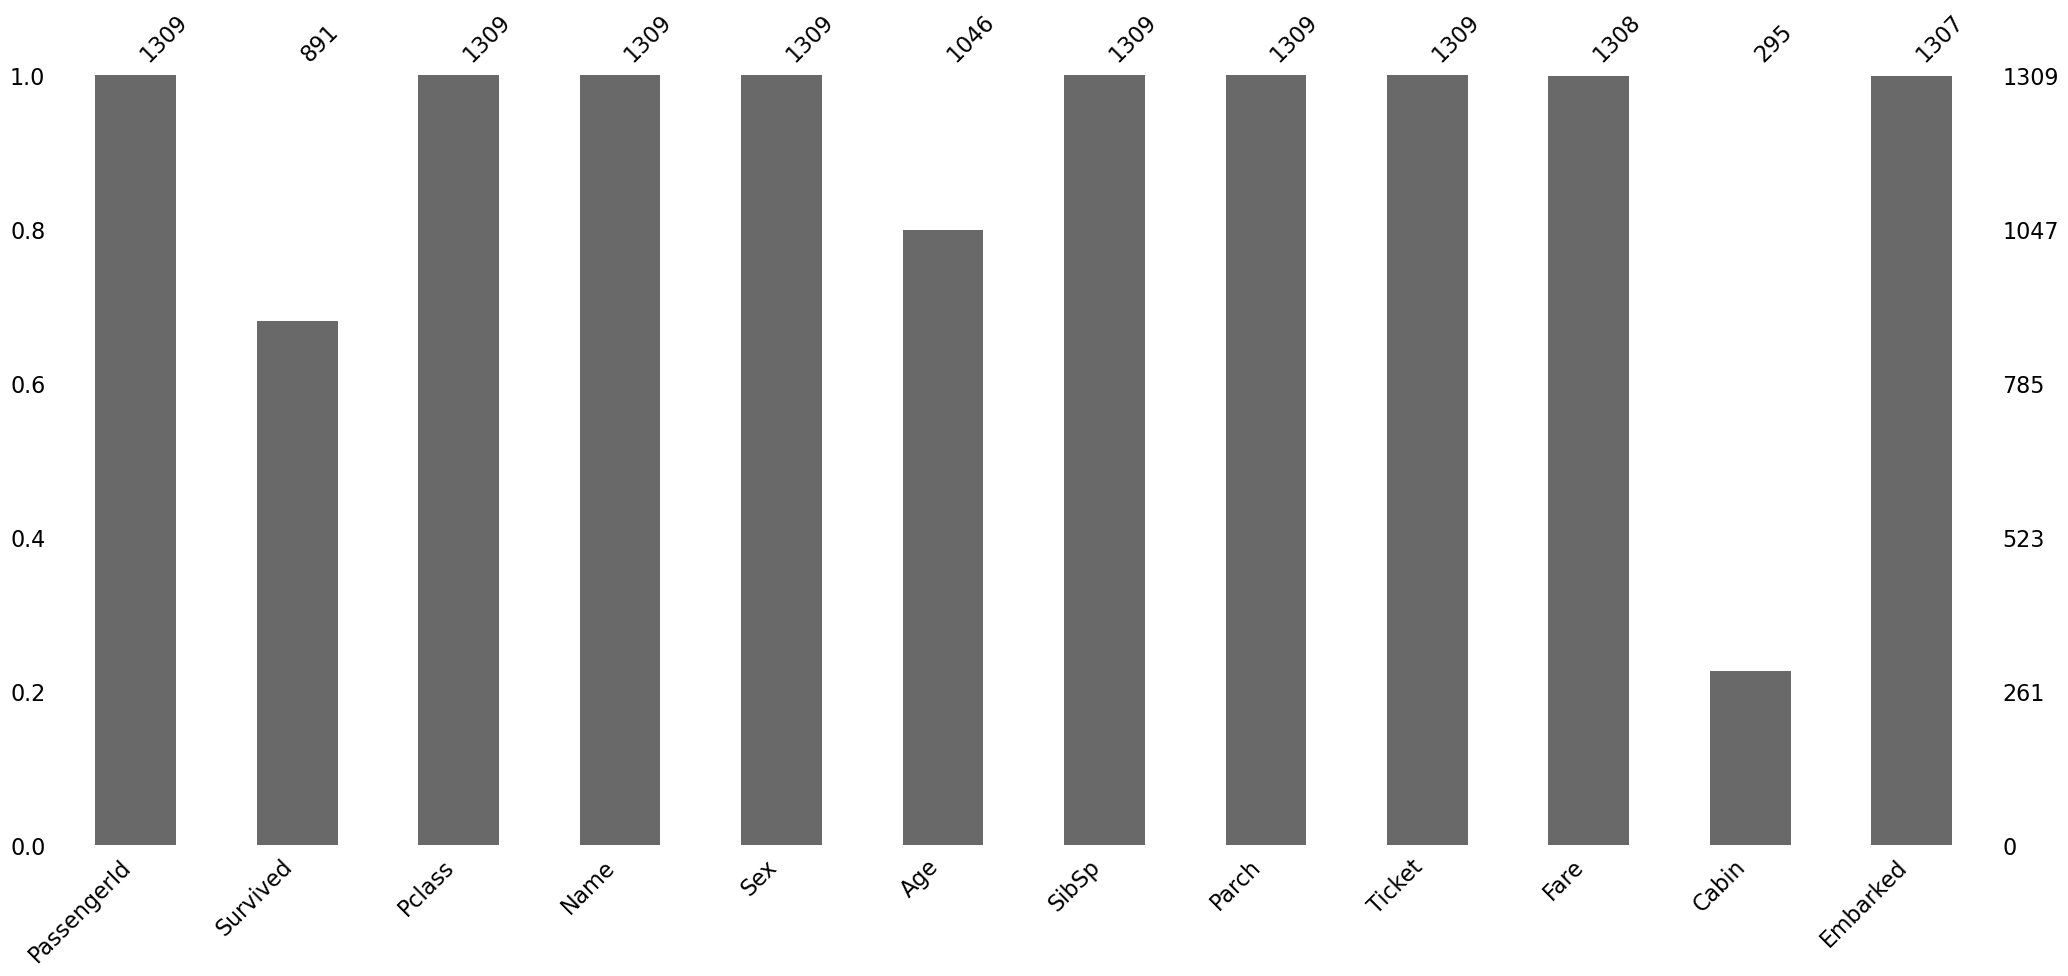

In [34]:
test['Survived'] = np.nan
df = pd.concat([train, test], ignore_index=True)
display(df.sample(5))
msno.bar(df);

### <center>Заполнение пропусков в Age

In [35]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

Мода: 24.0
Медиана: 28.0
Среднее: 29.881137667304014


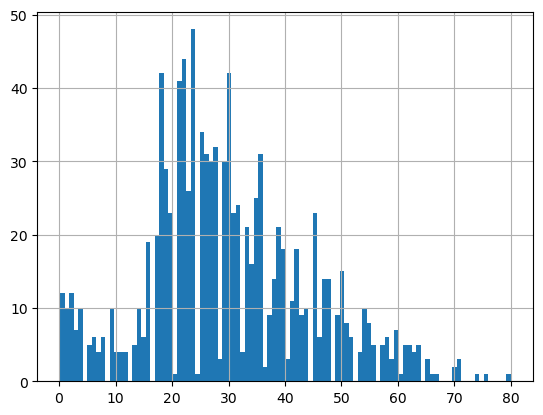

In [36]:
print(f"Мода: {df['Age'].mode()[0]}")
print(f"Медиана: {df['Age'].median()}")
print(f"Среднее: {df['Age'].mean()}")
df['Age'].hist(bins=100);

In [37]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Age'] = df['Age'].round().astype(int)

### <center>Заполнение пропуска в Fare

In [38]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [39]:
df['Fare'] = df.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mean()))
df[df['PassengerId'] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60,0,0,3701,13.302889,NaN,S


### Изменение значений в Sex и Embarked на цисловые

In [40]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Embarked'].value_counts()

Embarked
2    916
0    270
1    123
Name: count, dtype: int64

### <center>Получение номер палубы
#### Номер палубы - первая буква в номере каюты (в противном случае -1)

In [41]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = pd.Categorical(df['Deck']).codes
df.drop(columns=['Cabin'], inplace=True)
df['Deck'].value_counts()

Deck
-1    1014
 2      94
 1      65
 3      46
 4      41
 0      22
 5      21
 6       5
 7       1
Name: count, dtype: int64

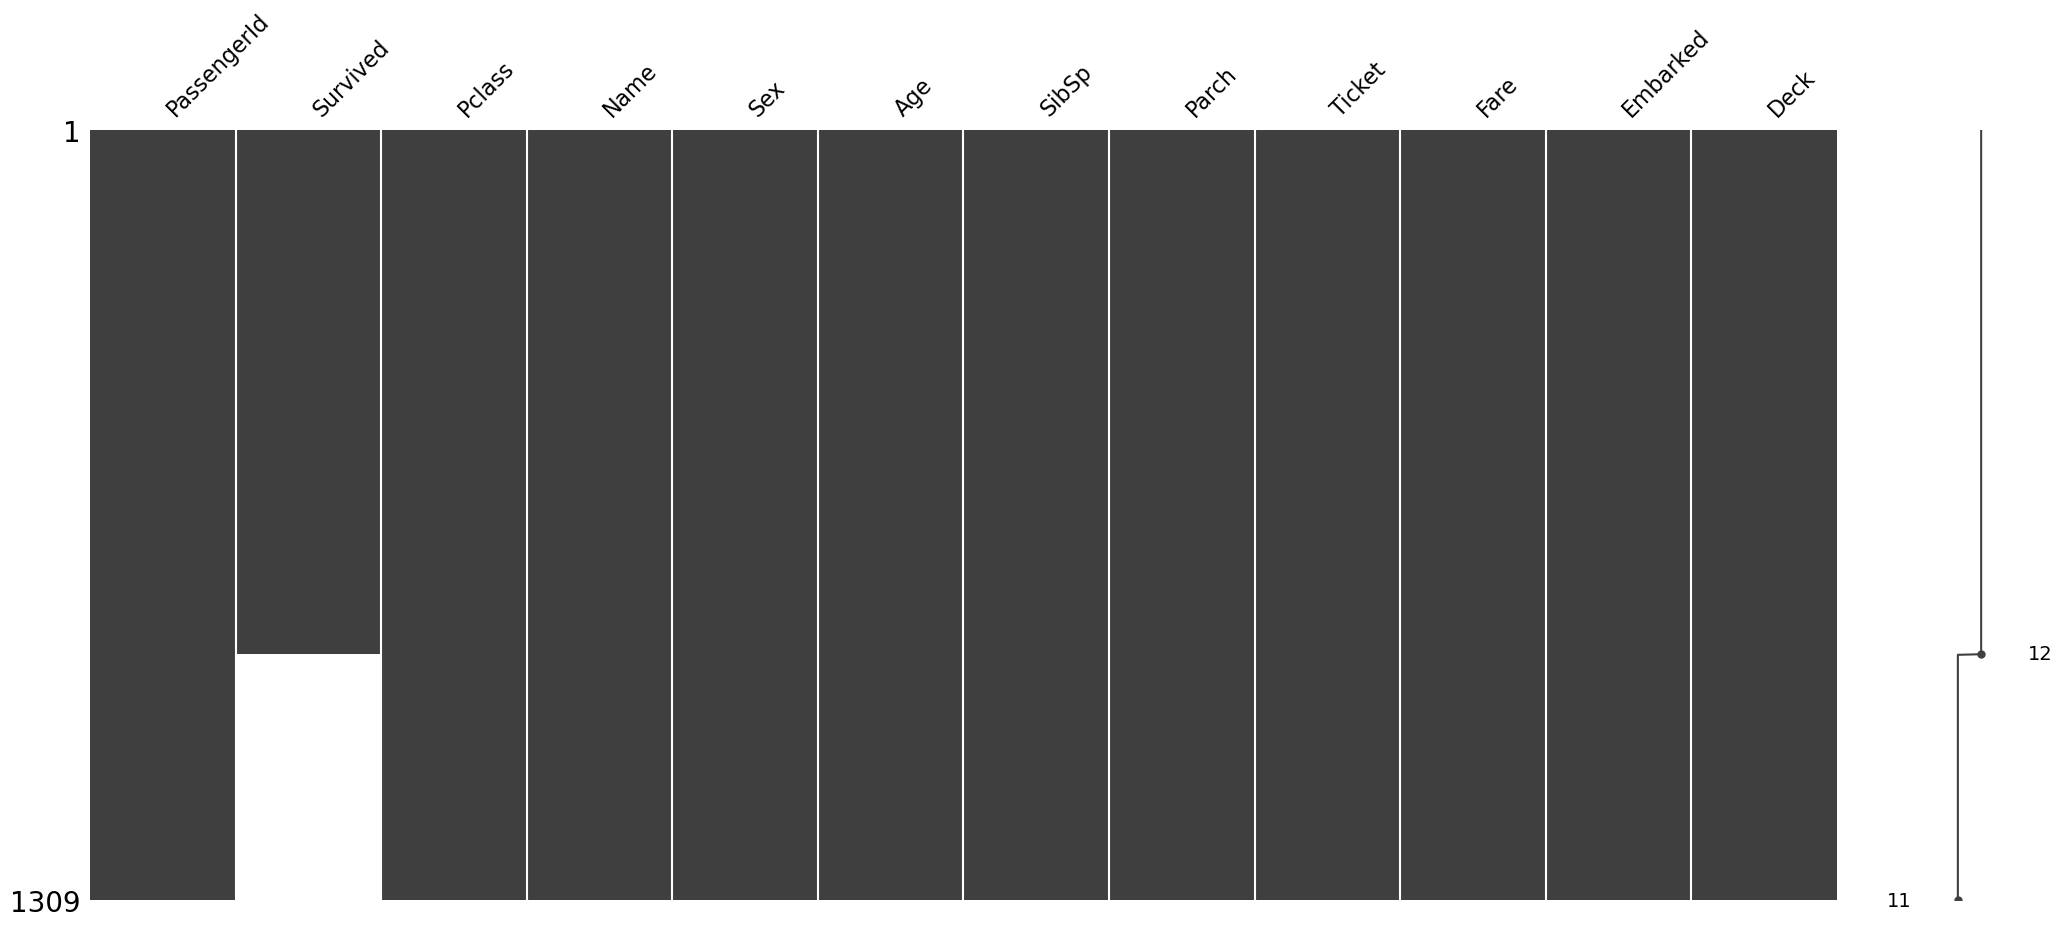

In [42]:
msno.matrix(df);

### <center>Поиск и удаление выбросов

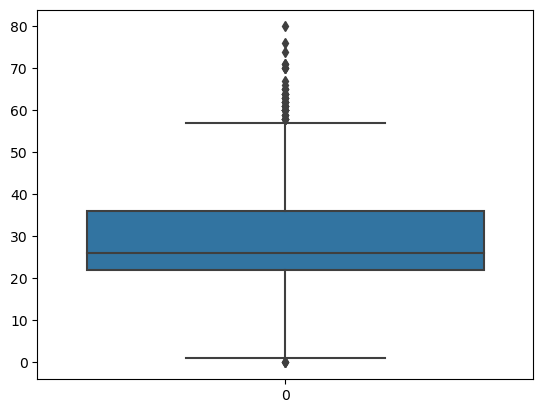

In [43]:
sns.boxplot(data=df['Age']);

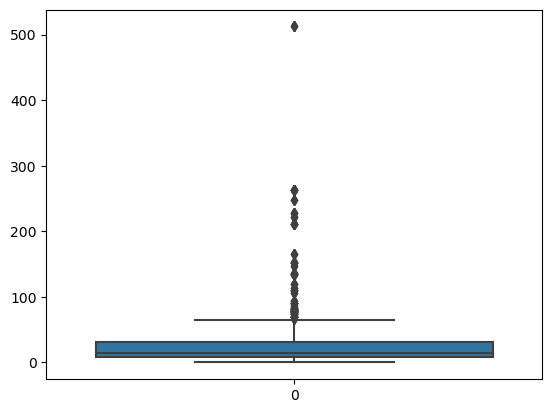

,Pclass,Fare
1234,1,512.3292
737,1,512.3292
679,1,512.3292
258,1,512.3292
341,1,263.0000
27,1,263.0000
88,1,263.0000
438,1,263.0000
944,1,263.0000
960,1,263.0000


,Pclass,Fare


In [44]:
sns.boxplot(data=df['Fare'])
plt.show()

Q1_Fare = df['Fare'].quantile(0.25)
Q3_Fare = df['Fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare
upper_outliers_Fare = df[df['Fare'] > (Q3_Fare + 1.5 * IQR_Fare)]

pd.set_option('display.max_rows', None)
display(upper_outliers_Fare.sort_values(by='Fare', ascending=False)[['Pclass', 'Fare']])

lower_outliers_Fare = df[df['Fare'] < (Q1_Fare - 1.5 * IQR_Fare)]
display(lower_outliers_Fare.sort_values(by='Fare', ascending=True)[['Pclass', 'Fare']])

In [45]:
max_Fare = df['Fare'].max()
second_max_Fare = sorted(df['Fare'].unique())[-2]
new_max_Fare = second_max_Fare + (max_Fare - int(max_Fare))
df['Fare'] = df['Fare'].replace(max_Fare, new_max_Fare)

In [46]:
df['SibSp'].value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [47]:
df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

### <center>Feature Engineering

In [48]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

In [49]:
df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split()[0].replace('.', '') if len(x.split()) > 1 else 'Unknown')
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [50]:
df.dtypes

PassengerId        int64
Survived         float64
Pclass             int64
Sex                int64
Age                int32
SibSp              int64
Parch              int64
Fare             float64
Embarked           int32
Deck                int8
FamilySize         int64
FarePerPerson    float64
TicketPrefix      object
dtype: object

In [51]:
df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck', 'FamilySize', 'FarePerPerson']].corr()['Survived']

Survived         1.000000
Pclass          -0.338481
Sex              0.543351
Age             -0.058434
SibSp           -0.035322
Parch            0.081629
Fare             0.270980
Embarked        -0.167675
Deck             0.287944
FamilySize       0.016639
FarePerPerson    0.245879
Name: Survived, dtype: float64

#### Из корреляции с целевой переменной видно, что переменная 'FarePerPerson' положительно, почти умеренно коррелирует с 'Survived' (умеренная по модулю корреляция: 0.3-0.49).

In [52]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = list(set(df.columns) - set(categorical_features) - {'PassengerId', 'Survived'})

In [53]:
ohe = OneHotEncoder(sparse_output = False, drop='first')
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

'''Кодирование категориального признака'''
categorical_encoded = ohe.fit_transform(df[categorical_features])
categorical_columns = ohe.get_feature_names_out(categorical_features)

'''Стандартизация возраста (приведение к стандартному нормамльному распределению)'''
age_standardized = std_scaler.fit_transform(df[['Age']])
df_temp = df[numerical_features].copy()
df_temp['Age'] = age_standardized

'''MinMaxScaler'''
numerical_transformed = mm_scaler.fit_transform(df_temp)

processed_data = np.hstack([
    categorical_encoded,
    numerical_transformed,
    df[['Survived']]
])

processed_columns = list(categorical_columns) + numerical_features + ['Survived']
df_processed = pd.DataFrame(processed_data, columns=processed_columns)

df_processed.head(5)

,TicketPrefix_A/4,TicketPrefix_A/5,TicketPrefix_A/S,TicketPrefix_A4,TicketPrefix_A5,TicketPrefix_AQ/3,TicketPrefix_AQ/4,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_CA/SOTON,...,Parch,SibSp,Deck,FarePerPerson,Age,Embarked,FamilySize,Pclass,Sex,Survived
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.125,0.000,0.013766,0.2750,1.0,0.1,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.125,0.375,0.135350,0.4750,0.0,0.1,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.030095,0.3250,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.125,0.375,0.100824,0.4375,1.0,0.1,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.030570,0.4375,1.0,0.0,1.0,0.0,0.0


In [54]:
x_train = df_processed[df.Survived.notna()].drop(columns=['Survived'])
y_train = df_processed[df.Survived.notna()][['Survived']].astype(int)
print(x_train.shape)

x_test = df_processed[df.Survived.isna()].drop(columns=['Survived']).reset_index(drop=True)
y_test = gender_submission[['Survived']]
print(x_test.shape)

(891, 49)
(418, 49)


### <center>Проверка accuracy на обычной логистической регрессии

In [55]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)
accuracy_score(y_test, pred)

0.937799043062201

### <center>Сохранение результата

In [56]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

train.to_excel("data/train_prepared.xlsx")
test.to_excel("data/test_prepared.xlsx")